In [2]:
#importing models that are needed for functions
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random

In [3]:
#importing the data, which is already in a numpy matrix. 
data = np.loadtxt("data_banknote_authentication.txt", delimiter=",")
np.random.shuffle(data)
#splitting x and y
y = data[:,4]
x = data[:,[0,1,2,3]]

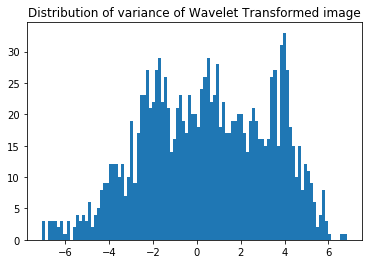

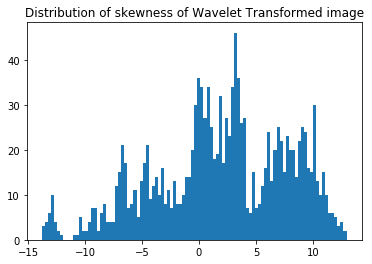

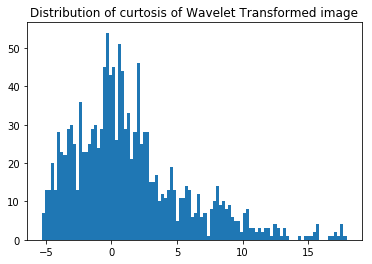

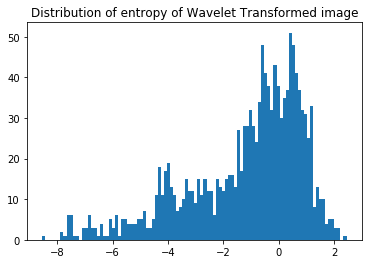

In [4]:
# visualising the data: the distribution of the values of each attribute
import matplotlib.pyplot as plt
plt.hist(x[:,0], bins=100)
plt.title("Distribution of variance of Wavelet Transformed image")
plt.show()
import matplotlib.pyplot as plt
plt.hist(x[:,1], bins=100)
plt.title("Distribution of skewness of Wavelet Transformed image")
plt.show()
import matplotlib.pyplot as plt
plt.hist(x[:,2], bins=100)
plt.title("Distribution of curtosis of Wavelet Transformed image")
plt.show()
import matplotlib.pyplot as plt
plt.hist(x[:,3], bins=100)
plt.title("Distribution of entropy of Wavelet Transformed image")
plt.show()


In [17]:
# feature scaling of the data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)
# splitting the data into train-,CV-, and testset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train, x_cv, y_train, y_cv = train_test_split(x_train,y_train, test_size=0.25)

from astropy.table import Table
t = Table([["trainingset","cross-validationset","testset","total"],
           [len(x_train),len(x_cv),len(x_test),len(x)]],names=("set","length"),dtype=None)
t

set,length
str19,int32
trainingset,822
cross-validationset,275
testset,275
total,1372


### Support Vector Machines

In [163]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(x_train, y_train) 
print("prediction score trainingset: " + str(clf.score(x_train,y_train,sample_weight=None)))
print("prediction score cross-validationset: " + str(clf.score(x_cv,y_cv,sample_weight=None)))

prediction score trainingset: 1.0
prediction score cross-validationset: 1.0


In [169]:
# testing SVM over different values of gamma and C and different kinds of kernels
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ["linear", "poly", "rbf", "sigmoid"]
param_grid = {'C': Cs, 'gamma' : gammas, 'kernel': kernels}
grid = GridSearchCV(estimator=clf, param_grid=param_grid)
grid.fit(x_train, y_train)
cl = GridSearchCV(clf, param_grid)
# I want to find the best parameter, so that the model will fit the data well.
print(grid.best_score_)
print(grid.best_estimator_)

1.0
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [172]:
#test set scores
print("predicition score testset: " + str(clf.score(x_test,y_test,sample_weight=None)))
y_predicted = clf.predict(x_test)

predicition score testset: 1.0


In [183]:
sum(y_test)

118.0

In [187]:
from sklearn import metrics
conmatrix = metrics.confusion_matrix(y_test,y_predicted)
tn = conmatrix[0][0]
tp = conmatrix[1][1]
fn = conmatrix[1][0]
fp = conmatrix[0][1]
pred = tp + fn
p = tp + fn
n = tn + fp
print(conmatrix)
N = tn+tp+fn+fp

[[157   0]
 [  0 118]]


In [191]:
table = Table([["error","accuracy","tp-rate","fp-rate","precision"],
           [(fp+fn)/N,(tp+tn)/N,tp/p,fp/n,tp/pred]],names=("evaluator","value"),dtype=None)
table

evaluator,value
str9,float64
error,0.0
accuracy,1.0
tp-rate,1.0
fp-rate,0.0
precision,1.0
